## Imports

In [ ]:
import pandas as pd
import numpy as np

## Data Collection

In [ ]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/House_Prices_Advanced_Regression_scikit.zip

--2021-09-16 12:27:46--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/House_Prices_Advanced_Regression_scikit.zip
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.64.7
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.64.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194642 (190K) [application/zip]
Saving to: ‘House_Prices_Advanced_Regression_scikit.zip’

House_Prices_Advanc 100%[===================>] 190.08K   200KB/s    in 1.0s    

2021-09-16 12:27:48 (200 KB/s) - ‘House_Prices_Advanced_Regression_scikit.zip’ saved [194642/194642]



In [ ]:
!unzip "House_Prices_Advanced_Regression_scikit.zip"

Archive:  House_Prices_Advanced_Regression_scikit.zip
  inflating: data_description.txt    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train_df = pd.read_csv("train.csv")
test_X_df = pd.read_csv("test.csv")

In [ ]:
train_Y_df = train_df['SalePrice']
train_X_df = train_df.drop(['SalePrice'], axis=1)

# Understanding Data

In [ ]:
train_X_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,DoesNotExist,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,DoesNotExist,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,DoesNotExist,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,DoesNotExist,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,DoesNotExist,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,DoesNotExist,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,DoesNotExist,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,DoesNotExist,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,DoesNotExist,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,10

Understanding what each feature represents and their value ranges

In [ ]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
train_X_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [ ]:
print(train_X_df.shape)
print(test_X_df.shape)

(1460, 80)
(1459, 80)


In [ ]:
print(train_X_df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object


In [ ]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
non_numerical_data = train_X_df.columns[train_X_df.dtypes == 'object']
print(non_numerical_data)
print(len(non_numerical_data))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


* You might've noticed that there are a total of 80 features, where 
  - 43 are categorical
  - 37 are numerical

* This data should be preprocessed and trained (Ridge Regression) using Pipelines in Scikit-learn.

**Checking the columns with missing values**

In [ ]:
print(train_X_df[train_X_df.isna()].columns)
print(test_X_df[test_X_df.isna()].columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The above columns with missing data are categorised into Discrete, Continuous, Ordinal, Nominal so that the missing values can be imputed appropriately.

# Applying [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) on House Prices Dataset using [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

## Preprocessing

* Dropping **`Id`** column from both train and test data as it doesn't help in predicting the prices

In [ ]:
train_X_df.drop(['Id'],axis=1, inplace=True)
test_X_df.drop(['Id'],axis=1, inplace=True)

### Removing Outliers

Removal of outliers based on the `GrLivArea` is recommended by the author 'Dean De Cook' of this dataset (Ames House Dataset).

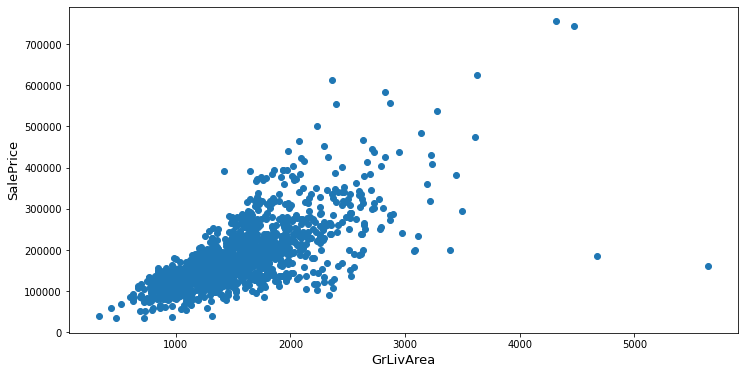

In [ ]:
import matplotlib.pyplot as plt

def plotGrLivAreaVsPrice():
    plt.figure(figsize=(12,6))
    plt.scatter(x=train_X_df.GrLivArea, y=train_Y_df)
    plt.xlabel("GrLivArea", fontsize=13)
    plt.ylabel("SalePrice", fontsize=13)

plotGrLivAreaVsPrice()

It can be observed from the above plot that there are two outliers with low `SalePrice` and high `GrLivArea`.

Remove these two outliers from the train data.

In [ ]:
outlier_condition = (train_X_df["GrLivArea"]>4000)&(train_Y_df<300000)

outlier_indices = train_X_df[outlier_condition].index
train_X_df.drop(outlier_indices,inplace=True)
train_Y_df.drop(outlier_indices,inplace=True)

Plotting the data again after handling outliers to check if they are removed

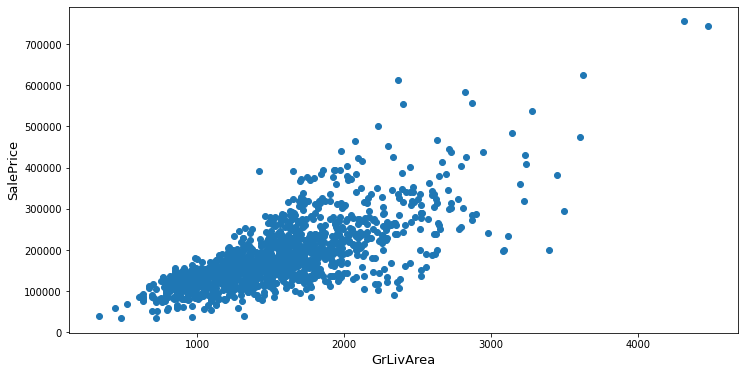

In [ ]:
plotGrLivAreaVsPrice()

### Numerical Data

In [ ]:
numerical_cols = train_X_df.columns[train_X_df.dtypes != 'object']
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

#### Discrete Data

* Extracting the list of discrete features from the above `numerical_cols`. Referred this from the data description provided in `data_description.txt`

* Creating a pipeline with [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to handle the missing values in these features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

discrete_cols = ['MSSubClass', 'OverallQual',
                 'OverallCond', 'YearBuilt',
                 'YearRemodAdd','FullBath',
                 'BsmtFullBath', 'BsmtHalfBath',
                 'FullBath', 'HalfBath', 
                 'BedroomAbvGr', 'KitchenAbvGr', 
                 'TotRmsAbvGrd', 'Fireplaces',  
                 'GarageYrBlt', 'GarageCars',
                 'MiscVal', 'MoSold', 'YrSold']

discrete_pipeline = Pipeline(steps=[('discrete_imputer', SimpleImputer(strategy = 'median'))])


#### Continuous Data

* Get the list of continuous features to preprocess them.
    * **HINT**: This obtained by removing discrete features from all of the numerical features (`numerical_cols`)
* Creating a pipeline with [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to handle the missing values in these features

In [ ]:
continous_cols = list(set(numerical_cols) - set(discrete_cols))
continuous_pipeline = Pipeline(steps=[('continuous_imputer', SimpleImputer(strategy = 'mean'))])

### Categorical Data

In [ ]:
categorical_cols = train_X_df.columns[train_X_df.dtypes == 'object']
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Ordinal Data

* Extracting the list of discrete features from the above `categorical_cols`. Referred this from the data description provided in `data_description.txt`

* Creating a pipeline with [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) 

* No missing values in Ordinal data, imputation is not required.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['ExterQual', 'ExterCond',
                'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1',
                'BsmtFinType2', 'HeatingQC',
                'Electrical', 'KitchenQual', 
                'FireplaceQu', 'GarageFinish',
                'GarageQual', 'GarageCond',
                'PoolQC', 'LandSlope',
                'Functional']

ordinal_categories=[['DoesNotExist', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                ['DoesNotExist', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],            ['DoesNotExist', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                ['DoesNotExist', 'Gd', 'Av', 'No', 'Mn'],                  ['DoesNotExist', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                ['DoesNotExist', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                ['DoesNotExist', 'Mix','FuseP','FuseF','FuseA','SBrkr'],   ['DoesNotExist', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                ['DoesNotExist', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],            ['DoesNotExist', 'Unf', 'RFn', 'Fin'],
                ['DoesNotExist', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],            ['DoesNotExist', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                ['DoesNotExist', 'Fa', 'TA', 'Gd', 'Ex'],                  ['DoesNotExist', 'Sev', 'Mod', 'Gtl'],
                ['DoesNotExist', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']]     

ordinal_pipeline = Pipeline(steps=[('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories))])     

#### Nominal Data

* Collecting the list of nominal features to preprocess them. It is obtained by removing ordinal features from all of the categorical features (`categorical_cols`)
* Create a pipeline with:
    * [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to fill missing values
    * [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to convert nominal data to numerical data.
        * Using `handle_unknown='ignore'` as an argument in `OneHotEncoder()`.<br>
        With this, if an unknown category is encountered during the transform in the test data, the resulting one-hot encoded columns for this feature will be zeros.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

nominal_cols = list(set(categorical_cols) - set(ordinal_cols))

nominal_pipeline = Pipeline(steps=[('nominal_imputer', SimpleImputer(strategy = 'most_frequent')),
                                   ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
                                   ])


### Column Transformer

* Creating a [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to preproccess the heterogenous data. All the pipelines created above are used in this transformer.

In [ ]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
                                        transformers=[
                                            ('discrete', discrete_pipeline, discrete_cols),
                                            ('continuous', continuous_pipeline, continous_cols),
                                            ('ordinal', ordinal_pipeline, ordinal_cols),
                                            ('nominal', nominal_pipeline, nominal_cols)
                                            ], 
                                        remainder='passthrough'
                                      )

## Cross-validation with Pipelines

* Creating a pipeline with a Scaler using the [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) as an estimator
  * Different feature scaling techniques: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler), [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) are used
  * Observing the difference in the performance with and without scaling the data


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(steps=[('preprocessor', column_transformer),
                       ('scaler', StandardScaler()),
                       ('ridge', Ridge())])


### Hyperparameter Tuning

* Tuning the hyperparameters using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Finding the best **regularization parameter** (`alpha` in [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)).
    * Passing the pipeline created as an argument to `RandomizedSearchCV`.
    * Predicted values are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs make sure that errors in predicting expensive houses and cheap houses will affect the result equally.)
    * So, in this case of regression, ['neg_mean_squared_log_error'](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html) used as the `scoring` metric 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distribution = {
    'ridge__alpha': uniform(loc=0, scale=600)
}

random_search_cv = RandomizedSearchCV(pipe, param_distributions=param_distribution, n_iter=30, scoring='neg_mean_squared_log_error', refit=True, cv=5, random_state=0) 
random_search_cv.fit(train_X_df, train_Y_df)
print(random_search_cv.best_params_)

{'ridge__alpha': 587.1710053396584}


Cross Validation Mean Score

In [ ]:
random_search_cv.cv_results_['mean_test_score'].max()

-0.020680590329734554

### Prediction on the Test Data

  * Predicting the target values for `test_X_df` using the best model (model trained using the optimal hyperparameters on the entire train data).


In [ ]:
best_model = random_search_cv.best_estimator_
predicted_test_Y = best_model.predict(test_X_df)
predicted_test_Y

array([113891.56015325, 173623.90026136, 182476.17064326, ...,
       178187.01973386, 110379.24944213, 220776.11859098])